### Mini-projet réalisé par Robin Mathelier, Adam Ismaili, Charles Raffegeau et Théo Dupuis dans le cadre du cours de Machine Learning de deuxième année à CentraleSupélec
Le but est ici de prendre en main des algorithmes de Machine Learning.
Nous nous intéressons à la prédiction de maladies cardio-vasculaires.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,recall_score,confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score

In [2]:
data = pd.read_csv(r'C:\Users\robin\Dropbox\Datasets\data_cardio.csv', sep = ',')

In [3]:
data.head()

,age,weight,height,cholesterol1,cholesterol2,cholesterol3,AP0,AP1,AP2,AP3,cardio
0,-0.436062,-0.847873,0.443452,1.0,0.0,0.0,1,0,0,0,0
1,0.307686,0.749831,-1.018168,0.0,0.0,1.0,0,0,1,0,1
2,-0.247997,-0.708942,0.078047,0.0,0.0,1.0,0,0,1,0,1
3,-0.748152,0.541435,0.565254,1.0,0.0,0.0,0,0,0,1,1
4,-0.808543,-1.264666,-1.018168,1.0,0.0,0.0,1,0,0,0,0


In [4]:
data.shape

(70000, 11)

In [5]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
X.shape,Y.shape

((70000, 10), (70000,))

In [6]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X

array([[-0.43606151, -0.84787326,  0.44345206, ..., -0.08186426,
        -0.46681992, -0.44455065],
       [ 0.30768633,  0.74983117, -1.01816804, ..., -0.08186426,
         2.14215367, -0.44455065],
       [-0.24799666, -0.70894244,  0.07804703, ..., -0.08186426,
         2.14215367, -0.44455065],
       ...,
       [-0.16328642,  2.13913938,  2.27047718, ..., -0.08186426,
        -0.46681992,  2.24946246],
       [ 1.20058905, -0.15321916, -0.16555632, ..., -0.08186426,
         2.14215367, -0.44455065],
       [ 0.43414373, -0.15321916,  0.68705541, ..., -0.08186426,
        -0.46681992, -0.44455065]])

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25)

In [8]:
x_train.shape

(52500, 10)

In [9]:
# Regression Logistique

In [10]:
clf = LogisticRegression(solver = 'liblinear', multi_class = 'ovr',max_iter = 300)

C = list(np.linspace(10,20,5))
grid_values = {'penalty': ['l1', 'l2'],'C':C}
grid_clf_acc = GridSearchCV(estimator=clf, param_grid = grid_values,n_jobs=-1,cv=5, scoring = 'f1')
grid_clf_acc.fit(x_train, y_train)

best_score_reg= grid_clf_acc.best_score_ 
print(best_score_reg)

print('Best Penalty:', grid_clf_acc.best_estimator_.get_params()['penalty'])
print('Best C:', grid_clf_acc.best_estimator_.get_params()['C'])

0.6868612712595475
Best Penalty: l1
Best C: 12.5


In [11]:
y_pred_log_reg = grid_clf_acc.predict(x_test)

C:\Users\robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


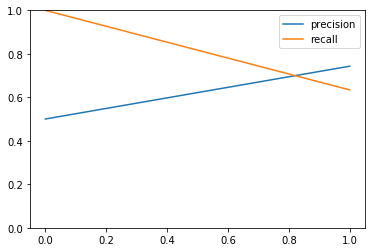

In [12]:
predictions = cross_val_predict(clf,x_train,y_train,cv=5)
precisions,recalls,thresholds = precision_recall_curve(y_test,y_pred_log_reg)
def plot_precision_recall_curve(precision,recall,thres):
    plt.plot(thres,precisions[:-1],label='precision')
    plt.plot(thres,recalls[:-1],label='recall')
    plt.ylim([0,1])
    plt.legend(loc='upper_right')
plot_precision_recall_curve(precisions,recalls,thresholds)
plt.show()

In [13]:
conf_mat = confusion_matrix(y_test,y_pred_log_reg)
conf_mat

array([[6825, 1919],
       [3203, 5553]], dtype=int64)

In [14]:
print('Accuracy for test set = {}'.format((conf_mat[0][0] + conf_mat[1][1])/len(y_test)))

Accuracy for test set = 0.7073142857142857


In [15]:
GDB = GradientBoostingClassifier()
GDB.fit(x_train,y_train)
y_pred_GBC = GDB.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred_GBC)
conf_mat

array([[6427, 2317],
       [2682, 6074]], dtype=int64)

In [16]:
GDB = GradientBoostingClassifier()
#grid_params = {'loss' : ['deviance','exponential']},'learning_rate' : list(np.linspace(0.01,10,10)),'min_samples_split': [150,200,250,300,350,400,450],'max_depth': [4,5,6,7],'n_estimators':[50,75,100,125,150]}
grid_params = {'learning_rate' : list(np.linspace(0.1,10,10)),'min_samples_split': [2,3]}
grid_GBC = GridSearchCV(estimator = GDB,param_grid = grid_params, scoring = 'accuracy',cv=5)
grid_GBC.fit(x_train,y_train)
best_score_reg= grid_GBC.best_score_ 
print(best_score_reg)

#print('Best loss:', grid_GBC.best_estimator_.get_params()['loss'])
print('Best learning rate:', grid_GBC.best_estimator_.get_params()['learning_rate'])
print('Best min_samples_split:', grid_GBC.best_estimator_.get_params()['min_samples_split'])
#print('Best max_depth:', grid_GBC.best_estimator_.get_params()['max_depth'])
#print('Best n_estimators:', grid_GBC.best_estimator_.get_params()['n_estimators'])

0.7168952380952381
Best learning rate: 0.1
Best min_samples_split: 2


In [17]:
GDB = GradientBoostingClassifier(learning_rate = 0.1)
GDB.fit(x_train,y_train)
best_score_reg= grid_GBC.best_score_ 
print(best_score_reg)

#print('Best loss:', grid_GBC.best_estimator_.get_params()['loss'])
print('Best learning rate:', grid_GBC.best_estimator_.get_params()['learning_rate'])
print('Best min_samples_split:', grid_GBC.best_estimator_.get_params()['min_samples_split'])
#print('Best max_depth:', grid_GBC.best_estimator_.get_params()['max_depth'])
#print('Best n_estimators:', grid_GBC.best_estimator_.get_params()['n_estimators'])

0.7168952380952381
Best learning rate: 0.1
Best min_samples_split: 2


In [18]:
y_pred_GDB = GDB.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred_GDB)
conf_mat

array([[6427, 2317],
       [2682, 6074]], dtype=int64)

In [20]:
recall_score(y_test,y_pred_GDB)

0.6936957514846962

C:\Users\robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


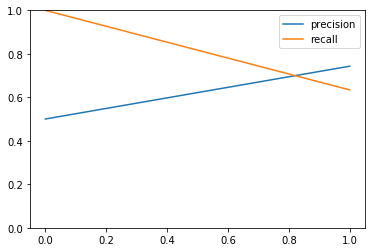

In [21]:
predictions = cross_val_predict(GDB,x_train,y_train,cv=5)
precisions,recalls,thresholds = precision_recall_curve(y_test,y_pred_log_reg)
def plot_precision_recall_curve(precision,recall,thres):
    plt.plot(thres,precisions[:-1],label='precision')
    plt.plot(thres,recalls[:-1],label='recall')
    plt.ylim([0,1])
    plt.legend(loc='upper_right')
plot_precision_recall_curve(precisions,recalls,thresholds)
plt.show()

In [22]:
y_pred_GDB_proba = GDB.predict_proba(x_test)
print(y_pred_GDB_proba[:,1].shape)

(17500,)


In [23]:
y_pred_thres = []
for x in list(y_pred_GDB_proba[:,1]) :
    if x < 0.34 :
        y_pred_thres += [0]
    else :
        y_pred_thres += [1]
#print(y_pred_thres)
y_pred_GDB_thres = np.array(y_pred_thres)
len(y_pred_thres)


17500

In [24]:
conf_mat = confusion_matrix(y_test,y_pred_thres)
conf_mat

array([[4423, 4321],
       [1331, 7425]], dtype=int64)

In [25]:
recall_score(y_test,y_pred_thres)

0.8479899497487438

In [26]:
precision_score(y_test,y_pred_thres)

0.6321300868380725